### Import libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import f_oneway
import numpy as np

### Load Datasets

In [13]:
# Load the data into a pandas DataFrames
df_2021_paid_0 = pd.read_csv("minutes_watched_2021_paid_0.csv")
df_2022_paid_0 = pd.read_csv("minutes_watched_2022_paid_0.csv")
df_2021_paid_1 = pd.read_csv("minutes_watched_2021_paid_1.csv")
df_2022_paid_1 = pd.read_csv("minutes_watched_2022_paid_1.csv")

In [14]:
# Perform an initial data exploration by displaying the first few rows of each DataFrame
print("2021 Paid 0:")
print(df_2021_paid_0.head())

print("\n2022 Paid 0:")
print(df_2022_paid_0.head())

print("\n2021 Paid 1:")
print(df_2021_paid_1.head())

print("\n2022 Paid 1:")
print(df_2022_paid_1.head())

2021 Paid 0:
   student_id  minutes_watched  paid_in_q2
0          66             0.72           0
1         132            71.92           0
2         560             1.37           0
3         606            18.12           0
4         615            18.93           0

2022 Paid 0:
   student_id  minutes_watched  paid_in_q2
0          67            27.03           0
1         560             1.22           0
2        1520             2.10           0
3        1907             4.68           0
4        2759             0.25           0

2021 Paid 1:
   student_id  minutes_watched  paid_in_q2
0           6           162.06           1
1         221           469.07           1
2         516            92.54           1
3         520           182.36           1
4         523          1322.25           1

2022 Paid 1:
   student_id  minutes_watched  paid_in_q2
0           6           134.16           1
1         389             0.15           1
2         616           464.08           1

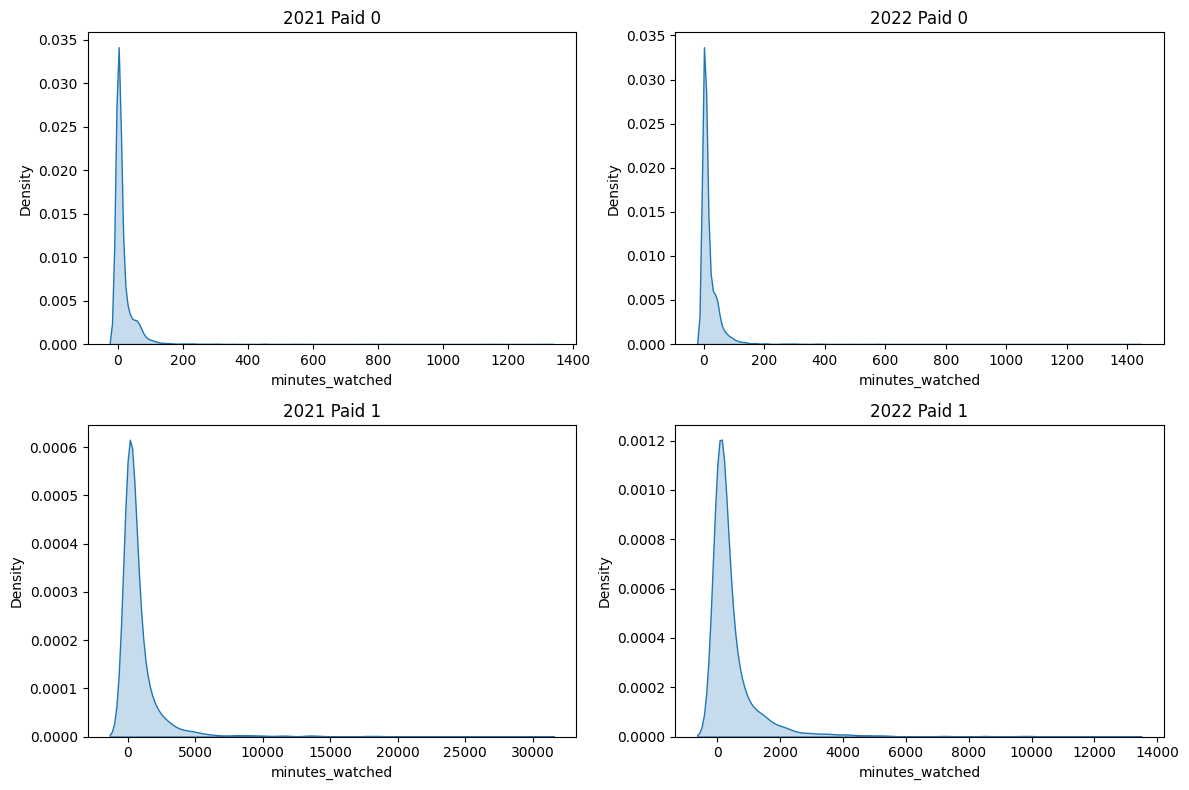

In [15]:
# Plot the distributions using seaborn's kdeplot() method we create four subplots displaying all four distributions simultaneously for better clarity
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_2021_paid_0, x="minutes_watched", fill=True)
plt.title("2021 Paid 0")

plt.subplot(2, 2, 2)
sns.kdeplot(data=df_2022_paid_0, x="minutes_watched", fill=True)
plt.title("2022 Paid 0")

plt.subplot(2, 2, 3)
sns.kdeplot(data=df_2021_paid_1, x="minutes_watched", fill=True)
plt.title("2021 Paid 1")

plt.subplot(2, 2, 4)
sns.kdeplot(data=df_2022_paid_1, x="minutes_watched", fill=True)
plt.title("2022 Paid 1")

plt.tight_layout()
plt.show()

In [16]:
# Define a function to remove outliers and save the filtered data as a CSV file
def remove_and_save_outliers(df, filename):
    # Calculate the 99th percentile of the minutes_watched column
    percentile_99 = df['minutes_watched'].quantile(0.99)

    # Remove outliers by keeping only values lower than the 99th percentile
    df_filtered = df[df['minutes_watched'] <= percentile_99]

    # Save the filtered data as a CSV file
    df_filtered.to_csv(filename, index=False)

In [17]:
# Call the function for each dataset
remove_and_save_outliers(df_2021_paid_0, "minutes_watched_2021_paid_0_no_outliers.csv")
remove_and_save_outliers(df_2022_paid_0, "minutes_watched_2022_paid_0_no_outliers.csv")
remove_and_save_outliers(df_2021_paid_1, "minutes_watched_2021_paid_1_no_outliers.csv")
remove_and_save_outliers(df_2022_paid_1, "minutes_watched_2022_paid_1_no_outliers.csv")

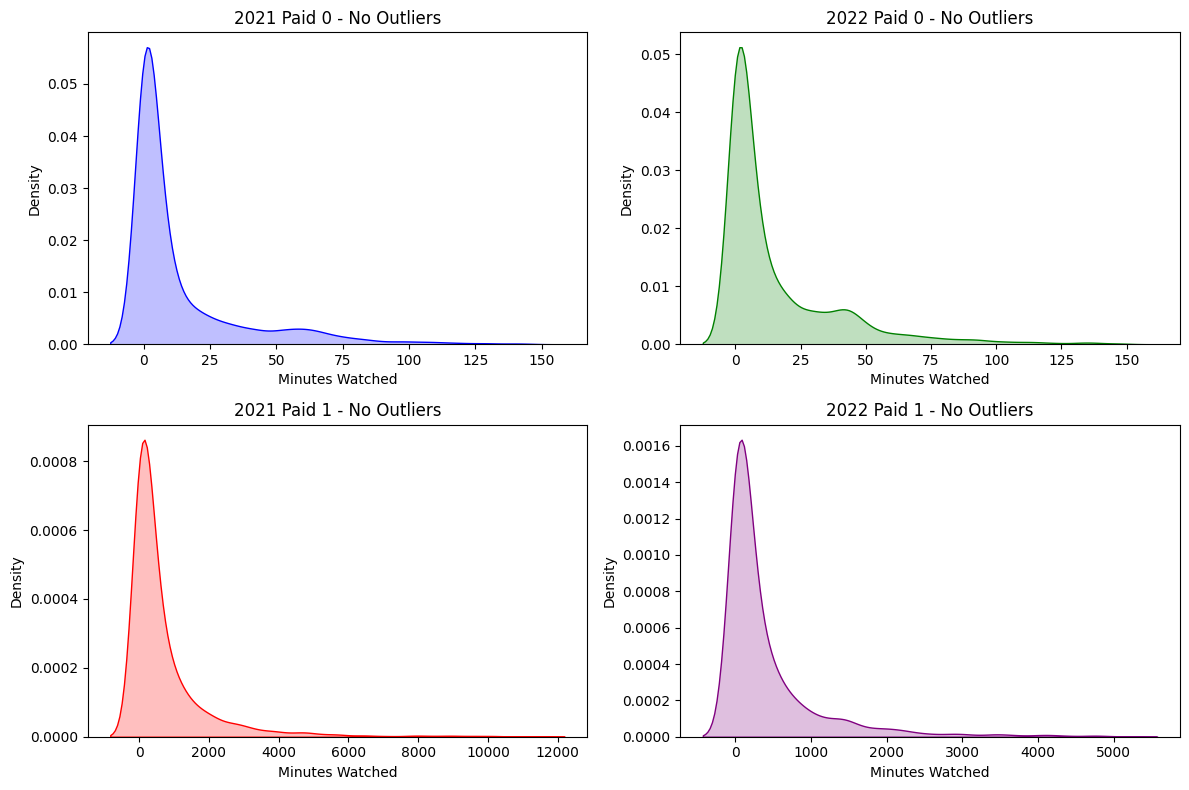

In [21]:
# Load the filtered data
df_2021_paid_0_no_outliers = pd.read_csv("minutes_watched_2021_paid_0_no_outliers.csv")
df_2022_paid_0_no_outliers = pd.read_csv("minutes_watched_2022_paid_0_no_outliers.csv")
df_2021_paid_1_no_outliers = pd.read_csv("minutes_watched_2021_paid_1_no_outliers.csv")
df_2022_paid_1_no_outliers = pd.read_csv("minutes_watched_2022_paid_1_no_outliers.csv")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create KDE plots for each cleaned dataset
sns.kdeplot(data=df_2021_paid_0_no_outliers['minutes_watched'], ax=axes[0, 0], color='blue', fill=True)
axes[0, 0].set_title("2021 Paid 0 - No Outliers")
sns.kdeplot(data=df_2022_paid_0_no_outliers['minutes_watched'], ax=axes[0, 1], color='green', fill=True)
axes[0, 1].set_title("2022 Paid 0 - No Outliers")
sns.kdeplot(data=df_2021_paid_1_no_outliers['minutes_watched'], ax=axes[1, 0], color='red', fill=True)
axes[1, 0].set_title("2021 Paid 1 - No Outliers")
sns.kdeplot(data=df_2022_paid_1_no_outliers['minutes_watched'], ax=axes[1, 1], color='purple', fill=True)
axes[1, 1].set_title("2022 Paid 1 - No Outliers")

# Add labels and titles
for ax in axes.flat:
    ax.set(xlabel="Minutes Watched", ylabel="Density")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Calculations for the excel part of the project
# alpha = 0.05
# df = 11021

# # Calculate the critical value
# critical_value = stats.t.ppf(1 - alpha / 2, df)

# print("Critical Value:", critical_value)

Critical Value: 1.9601792578685362


In [23]:
# Calculations for the excel part of the project
# alpha = 0.05
# df = 5289

# # Calculate the critical value
# critical_value = stats.t.ppf(1 - alpha / 2, df)

# print("Critical Value:", critical_value)

Critical Value: 1.9604126147113847


In [25]:
# Import dataset
raw_data = pd.read_csv('minutes_and_certificates.csv')

# Create a copy of the data
data = raw_data.copy()

# Preview the data
print(data.head())

   student_id  minutes_watched  certificates_issued
0        4640         586.8000                    1
1        5836        1903.1167                    3
2        9754         702.7667                    1
3         801        6066.0000                   13
4        2022         115.3667                    1


In [26]:
# Define the input (X) and target (y) variables
X = data[['minutes_watched']]
y = data['certificates_issued']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=365)

# Reshape the data
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the slope (m) and y-intercept (b)
m = model.coef_[0]
b = model.intercept_

# Print the linear equation
print(f'Linear Equation: y = {m:.4f}x + {b:.4f}')

# Calculate the R-squared
r_squared = model.score(X_test, y_test)
print(f'R-squared value: {r_squared:.2f}')

Linear Equation: y = 0.0017x + 1.0564
R-squared value: 0.12


- An R-squared value of 0.12 means that approximately 12% of the variance in certificates_issued can be explained by the minutes_watched. In other words, the linear regression model accounts for 12% of the variability in the number of certificates issued.

- A low R-squared value, such as 0.12, suggests that the relationship between minutes_watched and certificates_issued is not very strong. Other factors or variables not included in the model might play a significant role in determining the number of certificates issued.

In [27]:
minutes_watched = 1200
predicted_certificates = model.predict([[minutes_watched]])
print(f'Predicted certificates for 1200 minutes watched: {int(predicted_certificates[0] + 0.5)}')

Predicted certificates for 1200 minutes watched: 3


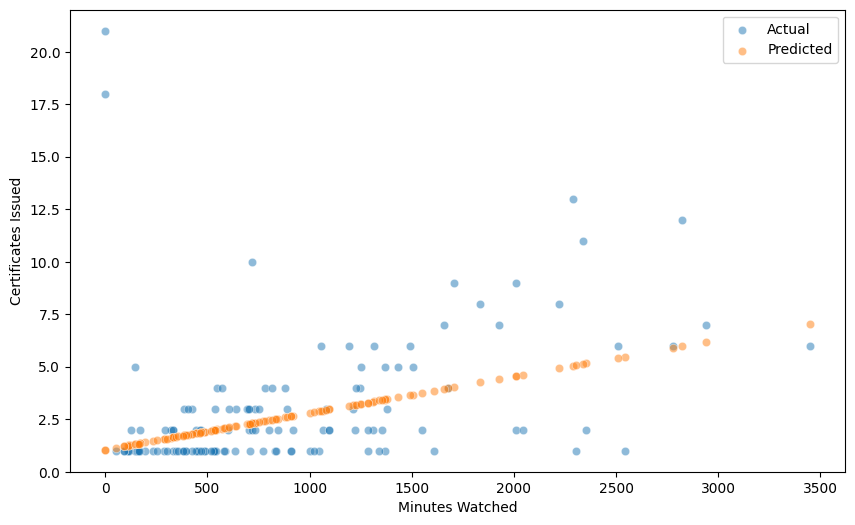

In [28]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual', alpha=0.5)
sns.scatterplot(x=X_test.flatten(), y=y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Minutes Watched')
plt.ylabel('Certificates Issued')
plt.legend()
plt.show()